<a href="https://colab.research.google.com/github/jtj7387/AI_2020_spring/blob/master/10_2_AND_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


import numpy as np
import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# AND
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [0],
          [0],
          [1]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [3]:
X = tf.placeholder(tf.float32, [None, 2]) # 데이터가 몇개가 들어올진 모르지만 데이터의 차원은 2차원이다.
Y = tf.placeholder(tf.float32, [None, 1]) # 데이터가 몇개가 들어올진 모르지만 데이터의 차원은 1차원이다.

* 안되는 네트워크 구조 예제. 되도록 고쳐봅시다. 

-> import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 버전이 다르기 때문에 교체해준다!



In [4]:
W = tf.Variable(tf.random_normal([2,1]), name='weight') # W1 [입력, 출력] b[몇 개에 적용되는지]
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [5]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [6]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [7]:
sess = tf.Session()

In [8]:
sess.run(tf.global_variables_initializer())

In [9]:
vcost =[]

In [10]:
for step in range(10001): # 점점 낮아짐. 0에 가까워짐

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
        
        print(cost1)

0.98445135
0.5551157
0.41245538
0.33223823
0.28053463
0.24386987
0.21617141
0.19432807
0.17656866
0.16179866
0.14929727


Text(0.5, 0, 'epoch')

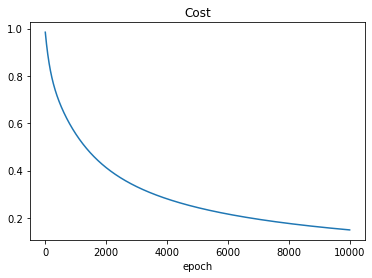

In [11]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [12]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})

In [13]:
print(test1[0][0]) # 결과가 거의 0이 나온다.

0.012707115


In [14]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})